In [35]:
%matplotlib inline  
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import tempfile
import imutils
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [112]:
def set_image_dpi(file_path):
    """
    Return opencv2 image from file_path with a DPI of 300. Optimized for pytesseract.
    """
    if isinstance(file_path, str):
        im = Image.open(file_path)
    else:
        im = image
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    temp_file = tempfile.NamedTemporaryFile(delete=False,   suffix='.png')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(300, 300))
    return cv2.imread(temp_filename)

In [115]:
img_name = "test_imgs/img0.jpg"

In [126]:
image = set_image_dpi(img_name)

In [135]:
"""Trying to find a bounding box for the receipts, to cut out noise. Not that successful at the moment."""
def cut_receipt_out(image, blocksize=10, ksize=50):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(gray, blocksize, ksize)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
    draw_contours(image, cnts)
    return edged

def draw_contours(image, cnts):
    screenCnt = None
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            screenCnt = approx
            cv2.imwrite('cropped_' + str(i) + '_img.jpg', image)
            break
    if screenCnt is not None:
        print("Drawing Contours")
        cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)

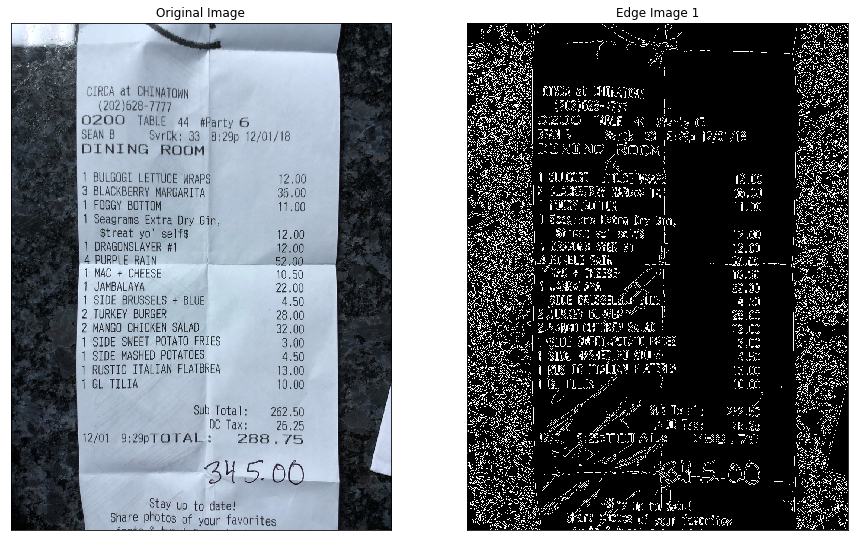

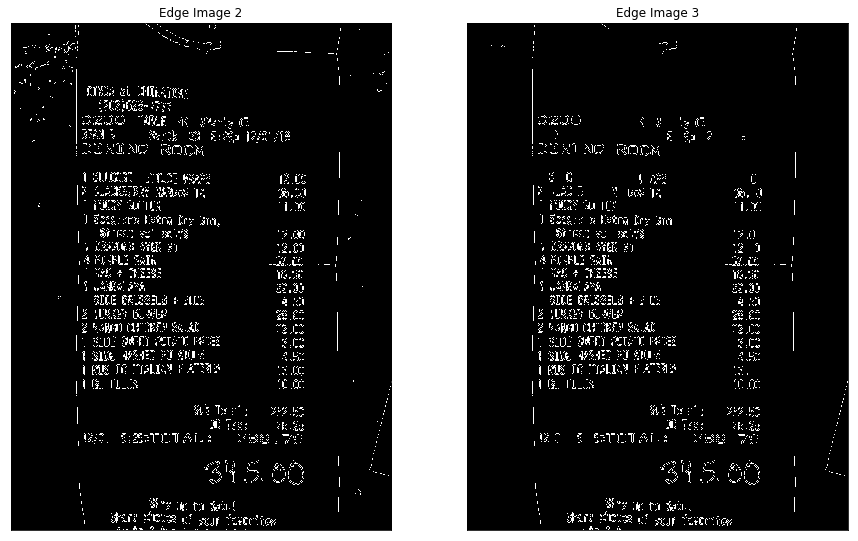

In [128]:
img1 = set_image_dpi(img_name)
edge1 = cut_receipt_out(img1, 5, 50)
edge2 = cut_receipt_out(img1, 100, 200)
edge3 = cut_receipt_out(img1, 100, 400)
# plt.rcParams['figure.figsize'] = [15, 10]

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edge1, cmap='gray')
plt.title('Edge Image 1'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(121),plt.imshow(edge2, cmap='gray')
plt.title('Edge Image 2'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edge3, cmap='gray')
plt.title('Edge Image 3'), plt.xticks([]), plt.yticks([])
plt.show()

In [56]:
image = cv2.imread(temp_filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mb = cv2.medianBlur(gray, 3)
bf = cv2.bilateralFilter(gray, 9, 10, 200)
th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
at_mean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, 11, 2)
at_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)

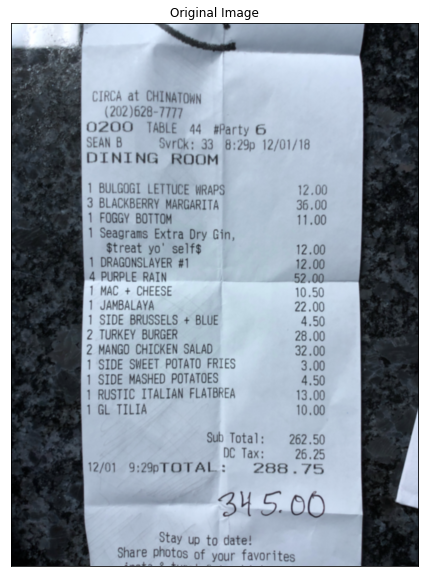

Original Image
“

CIRCA at CHINATOWN
p= (202) 628-7777
O200 TABLE 44 #Party 6
SEAN B SvrCk; 33 8:29p 12/01/18
DINING ROOM

 

BULGOGI LETTUCE WRAPS 12.00
3 BLACKBERRY MARGARITA 36.00
1 FOGGY BOTTOM 11.00
1 Seagrams Extra Dry Gin,
$treat yo' self$ 12.00
1 DRAGONSLAYER #1 12.00
4 PURPLE RAIN 52.00.
MAC + CHEESE 10.50
1 JAMBALAYA 22.00
1 SIDE BRUSSELS + BLUE 4,50
2 TURKEY BURGER 28 .00
2 MANGO CHICKEN SALAD 32.00
1 SIDE SWEET POTATO FRIES 3.00
1 SIDE MASHED POTATOES 4.50
1 RUSTIC ITALIAN FLATBREA 13.00
1 GL TILIA 10.00

Sub Total: 262.50
DC Tax: 26.25
12/01 9:29pTOTAL : 23838 275

Sieiell)

Stay up to date!
share photos of your favorites


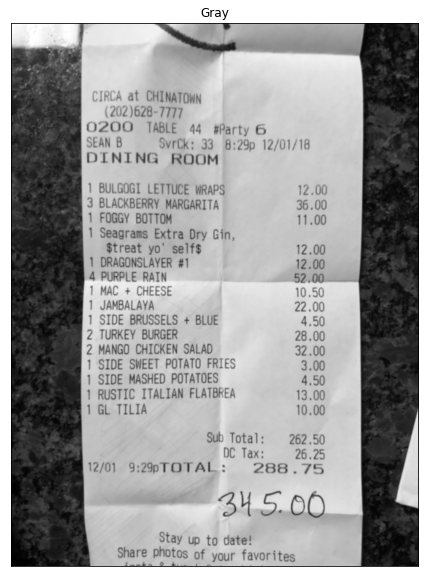

Gray
CIRCA at CHINATOWN
p= (202) 628-7777
O200 TABLE 44 #Party 6G
SEAN B SvrCk: 33 8:29p 12/01/18
DINING ROOM

1 BULGOGI LETTUCE WRAPS 12.00
3 BLACKBERRY MARGARITA 36.00
1 FOGGY BOTTOM 11.00
1 Seagrams Extra Dry Gin,

$treat yo' self$ 12.00
1 DRAGONSLAYER #1 12.00
4 PURPLE RAIN 52.00.
1 MAC + CHEESE 10.50
1 JAMBALAYA 22.00
1 SIDE BRUSSELS + BLUE 4,50
2 TURKEY BURGER 28.00
2 MANGO CHICKEN SALAD 32.00
1 SIDE SWEET POTATO FRIES 3.00
1 SIDE MASHED POTATOES 4.50
1 RUSTIC ITALIAN FLATBREA 13.00
1 GL TILIA 10.00

Sub Total: 262.50
DC Tax: 26.25
12/01 9:29p TOTAL : 2395.75

Sil)

Stay up to date!
share photos of your favorites


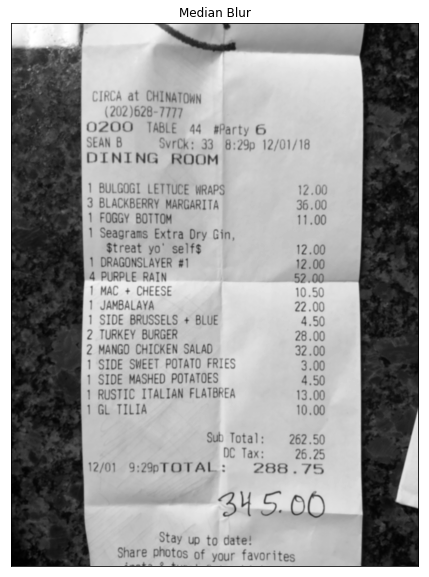

Median Blur
IRCA at CHINATOWN

(202)628-7777
O200 TABLE 44 #Party G
SEAN B SvrCk: 33 8:29p 12/01/18
DINING ROOM

1 BULGOGI LETTUCE WRAPS 12.00
3 BLACKBERRY MARGARITA 36 .00
1 FOGGY BOTTOM 11.00
1 Seagrams Extra Dry Gin,

$treat yo' self$ 12.00
1 DRAGONSLAYER #1 12.00
4 PURPLE RAIN 52.00.
1 MAC + CHEESE 10.50
1 JAMBALAYA 22.00
1 SIDE BRUSSELS + BLUE 4.50
2 TURKEY BURGER 28 .00
2 MANGO CHICKEN SALAD 32.00
1 SIDE SWEET POTATO FRIES 3.00
1 SIDE MASHED POTATOES 4.50
1 RUSTIC ITALIAN FLATBREA 13.00
1 GL TILIA 10.00

Sub Total: 262.50
OC Tax: 26.25
12/01 9:29pTOTAL: 4285.75

‘Dil

Stay up to date!
Share photos of your favorites


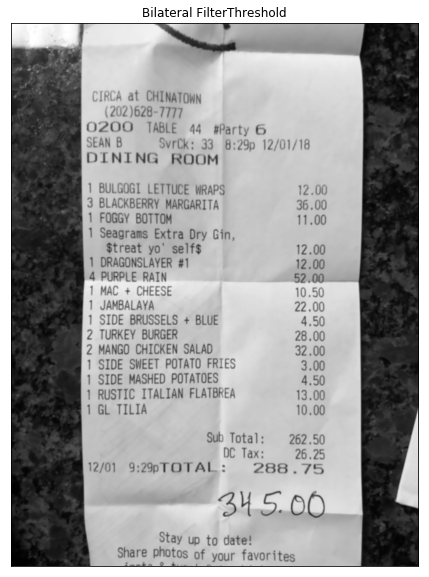

Bilateral FilterThreshold
CIRCA at CHINATOWN
§ = (202) 628-7777
O200 TABLE 44 #Party 6
SEAN B SvrCk: 33 8:29p 12/01/18
DINING ROOM

1 BULGOGI LETTUCE WRAPS 12.00
3 BLACKBERRY MARGARITA 36.00
1 FOGGY BOTTOM 11.00
1 Seagrams Extra Dry Gin,

$treat yo' self$ 12.00
1 DRAGONSLAYER #1 12.00
4 PURPLE RAIN 52.00.
1 MAC + CHEESE 10.50
1 JAMBALAYA 22.00
1 SIDE BRUSSELS + BLUE 4.50
2 TURKEY BURGER 28 .00
2 MANGO CHICKEN SALAD 32.00
1 SIDE SWEET POTATO FRIES 3.00
1 SIDE MASHED POTATOES 4,50
1 RUSTIC ITALIAN FLATBREA 13.00
1 GL TILIA 10.00

Sub Total: 262.50
DC Tax: 26.25
12/01 9:29pTOTAL : 253,75

Sil)

Stay up to date!
share photos of your favorites


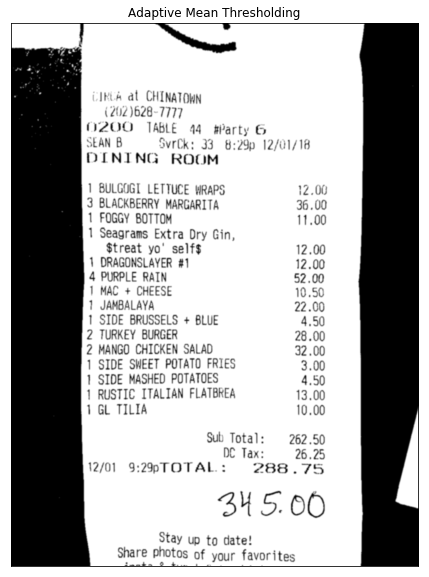

Adaptive Mean Thresholding
_

CIRCA at CHINATOWN
B  (202)628-7777
M200 TABLE 44° #Party G
SEAN B SvrCk: 33° 8:29p 12/01/18
DINING ROOM

1 BULGUGI LETTUCE WRAPS 12.00
3 BLACKBERRY MARGARITA 36.00
1 FOGGY BOTTOM 11.00
1 Seagrams Extra Dry Gin,

$treat yo' self$ 12.00
1 DRAGONSLAYER #1 12.00
4 PURPLE RAIN 52.00
1 MAC + CHEESE 10.50
1 JAMBALAYA 22.00
1 SIDE BRUSSELS + BLUE 4,50
2 TURKEY BURGER 28.00
2 MANGO CHICKEN SALAD 32.00
1 SIDE SWEET POTATO FRIES 3.00
1 SIDE MASHED POTATOES 4.50
| RUSTIC ITALIAN FLATBREA 13.00
1 GL TILIA 10.00

Sub Total: 262 .50
De Tax: 26.25
12/01 9:29p> TOTAL : 288.75

34 5. 00

Stay up to date!
Share photos of your favorites


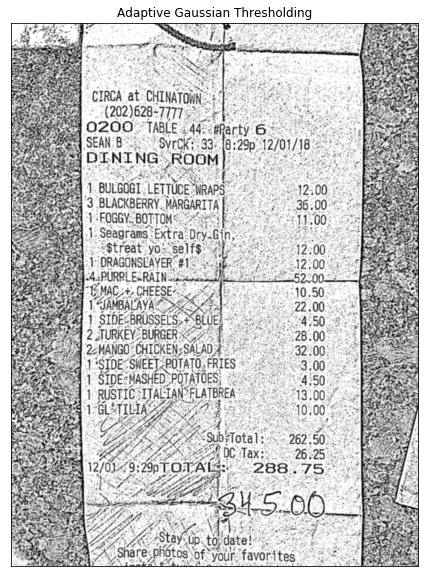

Adaptive Gaussian Thresholding



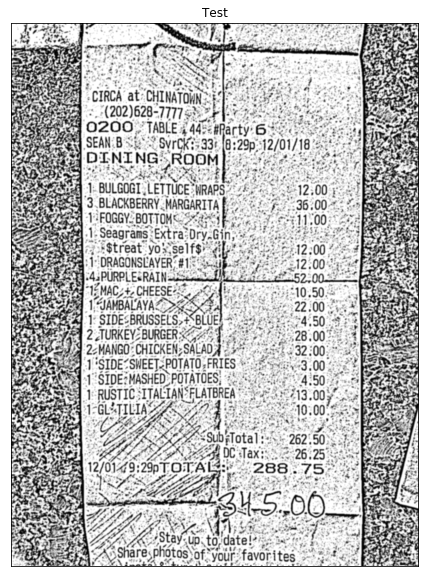

Test
“4,PURPLE&RAL

sMAC #2 CHEESE

Le

JAMBALAYAZ


In [59]:
titles = ['Original Image',
          'Gray',
          'Median Blur',
          'Bilateral Filter'
          'Threshold',
          'Adaptive Mean Thresholding',
          'Adaptive Gaussian Thresholding',
          'Test']


images = [image, gray,mb, bf, th, at_gaussian, at_mean, test1]
for i in range(len(titles)):
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.figure()
    plt.imshow(images[i], cmap="gray", interpolation='bicubic')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    plt.show()
    print(titles[i])
    filename = "{}.png".format(os.getpid())
    cv2.imwrite(filename, images[i])
    text = pytesseract.image_to_string(Image.open(filename))
    os.remove(filename)
    print(text)


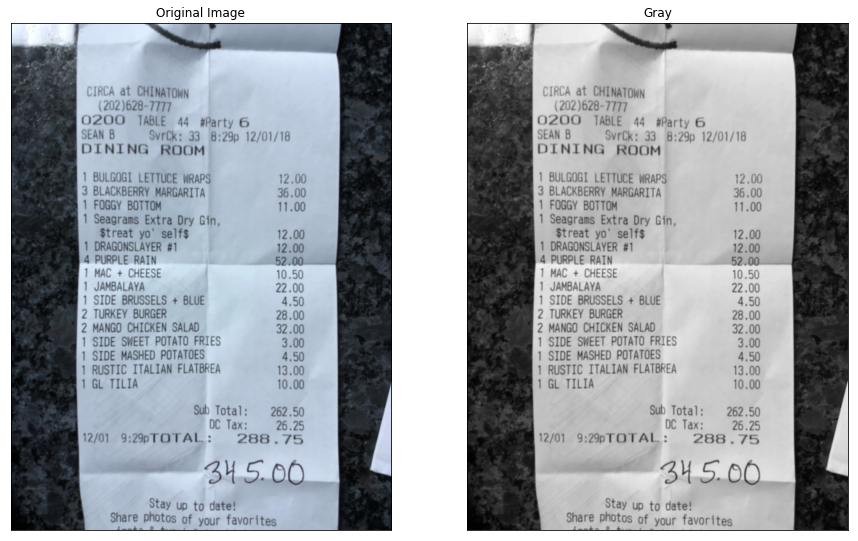

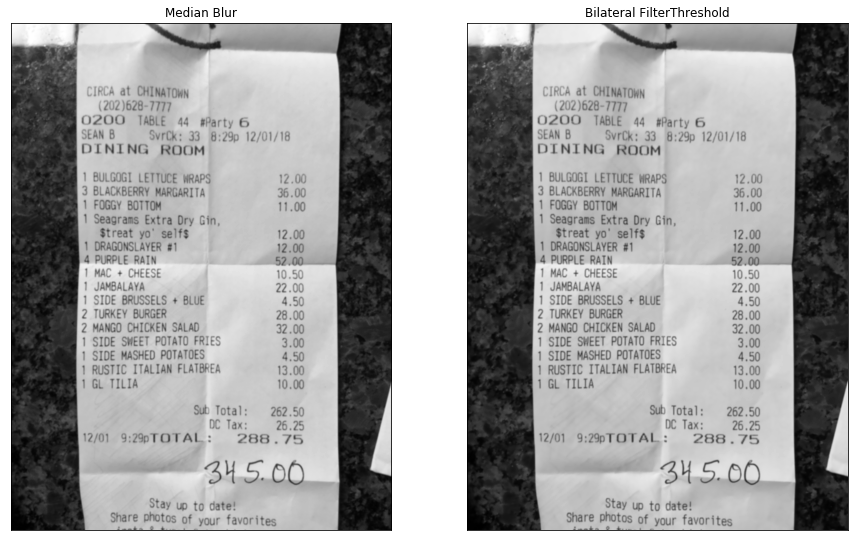

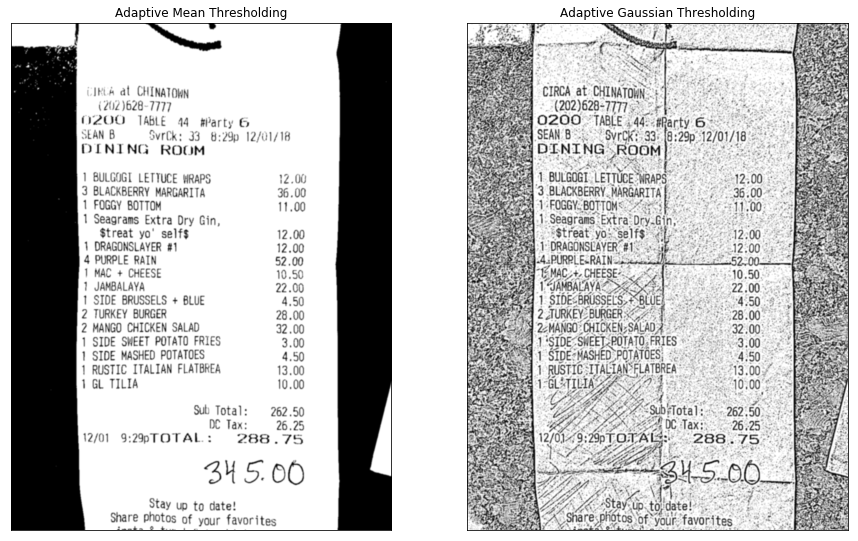

In [133]:
titles = ['Original Image',
          'Gray',
          'Median Blur',
          'Bilateral Filter'
          'Threshold',
          'Adaptive Mean Thresholding',
          'Adaptive Gaussian Thresholding']

every_other = False
images = [image, gray,mb, bf, th, at_gaussian, at_mean]
for i in range(len(titles)):
    plt.rcParams['figure.figsize'] = [15, 10]
    if every_other:
        plt.subplot(122), plt.imshow(images[i], cmap="gray", interpolation='bicubic')
        plt.title(titles[i]), plt.xticks([]), plt.yticks([])
        plt.show()
        every_other = False
    else:
        plt.subplot(121), plt.imshow(images[i], cmap="gray", interpolation='bicubic')
        plt.title(titles[i]), plt.xticks([]), plt.yticks([])
        every_other = True
# For odd number of graphs
if every_other:
    plt.show()